# Jupyter Notebook to Explain Usage of the python TSE library
This notebooks purpose is to explain the usage of the methods contained within *evaluation/lib/utils.py*.
The file provides a collection of handy static methods for reading and processing data generated by an Eclipse MOSAIC simulation using the TSE Applications.
The provided data consists of 2 hours of traffic along a straight road.

In [1]:
# Imports
%load_ext autoreload
%autoreload 2
import sys
# add path to utilities so module can be imported 
sys.path.insert(0, '..')
import lib.utils as utils

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading Traversal data from the database
trav_data_df = utils.read_database_data('../data/FcdData_example.sqlite', sql=utils.SQL_TRAVERSAL_MEAN_SPEED)
trav_data_df

start processing database: ../data/FcdData_example.sqlite
finish processing database: ../data/FcdData_example.sqlite took 0.01s


,vehID,timeStamp,connectionID,nextConnectionID,temporalMeanSpeed,spatialMeanSpeed,relativeTrafficStatusMetric,traversalTime,naiveMeanSpeed,timeOfInsertionUTC
time,,,,,,,,,,
1970-01-01 00:00:37,veh_0,37000000000,4068038_21487168_251150126,4068038_251150126_428788319,2.974736,2.297212,0.798588,11784014563,2.469829,2024-01-05 10:32:44
1970-01-01 00:01:07,veh_2,67000000000,4068038_21487168_251150126,4068038_251150126_428788319,2.972047,2.430886,0.793584,11794676651,2.455289,2024-01-05 10:32:44
1970-01-01 00:01:38,veh_4,98000000000,4068038_21487168_251150126,4068038_251150126_428788319,2.837303,2.589872,0.792658,12354808270,2.469215,2024-01-05 10:32:44
1970-01-01 00:02:08,veh_6,128000000000,4068038_21487168_251150126,4068038_251150126_428788319,2.731202,2.415221,0.803384,12834767050,2.308145,2024-01-05 10:32:44
1970-01-01 00:02:11,veh_0,131000000000,4068038_251150126_428788319,4068038_428788319_408194194,2.457391,2.497084,0.515740,90633429356,2.439412,2024-01-05 10:32:44
...,...,...,...,...,...,...,...,...,...,...
1970-01-01 01:24:09,veh_196,5049000000000,32935479_252864802_21487170,30806885_21487170_299080425,12.946228,12.965162,0.000000,72002044740,12.944076,2024-01-05 10:32:51
1970-01-01 01:24:23,veh_202,5063000000000,4609243_252864801_252864802,32935479_252864802_21487170,13.893062,13.689803,0.000000,20030224788,13.664306,2024-01-05 10:32:51
1970-01-01 01:24:33,veh_198,5073000000000,32935479_252864802_21487170,30806885_21487170_299080425,13.477186,13.562870,0.000000,69165398620,13.461015,2024-01-05 10:32:51


In [3]:
# Read all FCD Records from the database
fcd_records_df = utils.read_database_data('../data/FcdData_example.sqlite', sql=utils.SQL_FCD_RECORDS)
fcd_records_df

start processing database: ../data/FcdData_example.sqlite
finish processing database: ../data/FcdData_example.sqlite took 0.15s


,vehID,timeStamp,latitude,longitude,connectionID,offset,speed
time,,,,,,,
1970-01-01 00:00:01,veh_0,1000000000,52.512070,13.322590,25185006_21487146_21487168,5.343898,0.000000
1970-01-01 00:00:02,veh_0,2000000000,52.512078,13.322605,25185006_21487146_21487168,6.662275,1.318378
1970-01-01 00:00:03,veh_0,3000000000,52.512090,13.322628,25185006_21487146_21487168,8.745976,2.083700
1970-01-01 00:00:04,veh_0,4000000000,52.512102,13.322651,25185006_21487146_21487168,10.838488,2.092512
1970-01-01 00:00:05,veh_0,5000000000,52.512115,13.322676,25185006_21487146_21487168,13.037361,2.198873
...,...,...,...,...,...,...,...
1970-01-01 01:25:30,veh_202,5130000000000,52.514191,13.349060,32935479_252864802_21487170,915.197429,10.634345
1970-01-01 01:25:31,veh_202,5131000000000,52.514134,13.349208,32935479_252864802_21487170,927.115009,11.917581
1970-01-01 01:25:32,veh_202,5132000000000,52.514051,13.349333,30806885_21487170_299080425,9.433893,12.685499


In [4]:
# Reading Edge Data
edge_data_df = utils.read_sumo_edge_data('../data/edge-data_example.xml')
edge_data_df

,timeStamp,connectionID,speed,speedRelative
time,,,,
1970-01-01 00:00:00,0,25185003_21487145_21487148,2.41,0.17
1970-01-01 00:00:00,0,25185006_21487146_21487168,2.33,0.17
1970-01-01 00:00:00,0,30194726_27011222_21487169,2.37,0.17
1970-01-01 00:00:00,0,30806885_21487170_299080425,2.44,0.18
1970-01-01 00:00:00,0,32935479_252864802_21487170,2.41,0.17
...,...,...,...,...
1970-01-01 01:15:00,4500000000000,4609241_423839225_408194196,12.57,0.91
1970-01-01 01:15:00,4500000000000,4609242_27537748_27537747,12.39,0.89
1970-01-01 01:15:00,4500000000000,4609243_252864801_252864802,12.33,0.89


In [5]:
# Resampling Traversal Data to be aggregated for each edge within a 15-minute window
resampled_trav_data_df = utils.resample_traversal_data_per_edge(trav_data_df, window='15min')
resampled_trav_data_df

temporalMeanSpeed  \
connectionID                time                                     
32935479_252864802_21487170 1970-01-01 00:00:00           2.424424   
                            1970-01-01 00:15:00           2.422916   
                            1970-01-01 00:30:00           6.606474   
                            1970-01-01 00:45:00           6.592923   
                            1970-01-01 01:00:00          14.112699   
                            1970-01-01 01:15:00          13.117917   
36337928_26704448_27537750  1970-01-01 00:00:00           3.488249   
                            1970-01-01 00:15:00           3.372851   
                            1970-01-01 00:30:00           8.412403   
                            1970-01-01 00:45:00           8.791942   
                            1970-01-01 01:00:00          15.013186   
                            1970-01-01 01:15:00          14.470529   
4068038_21487168_251150126  1970-01-01 00:00:00           2.881874   
                            1970-01-01 00:15:00           2.904893   
                            1970-01-01 00:30:00           7.532261   
                            1970-01-01 00:45:00           7.742005   
                            1970-01-01 01:00:00          13.408733   
                            1970-01-01 01:15:00          13.142545   
4068038_251150126_428788319 1970-01-01 00:00:00           2.421237   
                            1970-01-01 00:15:00           2.425058   
                            1970-01-01 00:30:00           6.588523   
                            1970-01-01 00:45:00           6.607887   
                            1970-01-01 01:00:00          14.257077   
                            1970-01-01 01:15:00          13.290649   
4068038_408194194_423839224 1970-01-01 00:00:00           2.450449   
                            1970-01-01 00:15:00           2.436626   
                            1970-01-01 00:30:00           6.659332   
                            1970-01-01 00:45:00           6.623834   
                            1970-01-01 01:00:00          14.277122   
                            1970-01-01 01:15:00          13.333152   
4068038_423839224_26704448  1970-01-01 00:00:00           3.686546   
                            1970-01-01 00:15:00           3.404157   
4068038_428788319_408194194 1970-01-01 00:00:00           3.934061   
                            1970-01-01 00:15:00           3.809711   
                            1970-01-01 00:30:00           9.060526   
                            1970-01-01 00:45:00           8.896975   
                            1970-01-01 01:00:00          14.894668   
                            1970-01-01 01:15:00          12.487873   
4609243_252864801_252864802 1970-01-01 00:00:00           2.446488   
                            1970-01-01 00:15:00           2.442258   
                            1970-01-01 00:30:00           6.651704   
                            1970-01-01 00:45:00           6.663334   
                            1970-01-01 01:00:00          14.329297   
                            1970-01-01 01:15:00          13.404852   
4609243_27537749_252864801  1970-01-01 00:00:00           2.564916   
                            1970-01-01 00:15:00           2.534009   
                            1970-01-01 00:30:00           6.810861   
                            1970-01-01 00:45:00           6.941119   
                            1970-01-01 01:00:00          14.753155   
                            1970-01-01 01:15:00          12.845926   
4609244_27537750_27537749   1970-01-01 00:00:00           2.440098   
                            1970-01-01 00:15:00           2.430887   
                            1970-01-01 00:30:00           6.611566   
                            1970-01-01 00:45:00           6.610417   
                            1970-01-01 01:00:00          14.323060   
                            1970-01-01 01:15:00          13

In [6]:
# Resampling Edge Data to be aggregated for each edge within a 15-minute window
resampled_edge_data_df = utils.resample_edge_data_per_edge(edge_data_df, window='15min')
resampled_edge_data_df

speed  samples  timeStamp
connectionID               time                                          
25185003_21487145_21487148 1970-01-01 00:00:00   2.41        1        0.0
                           1970-01-01 00:15:00   2.42        1      900.0
                           1970-01-01 00:30:00   6.56        1     1800.0
                           1970-01-01 00:45:00   6.60        1     2700.0
                           1970-01-01 01:00:00  11.24        1     3600.0
...                                               ...      ...        ...
4609244_27537750_27537749  1970-01-01 00:15:00   2.39        1      900.0
                           1970-01-01 00:30:00   6.56        1     1800.0
                           1970-01-01 00:45:00   6.53        1     2700.0
                           1970-01-01 01:00:00  14.42        1     3600.0
                           1970-01-01 01:15:00  12.24        1     4500.0

[150 rows x 3 columns]

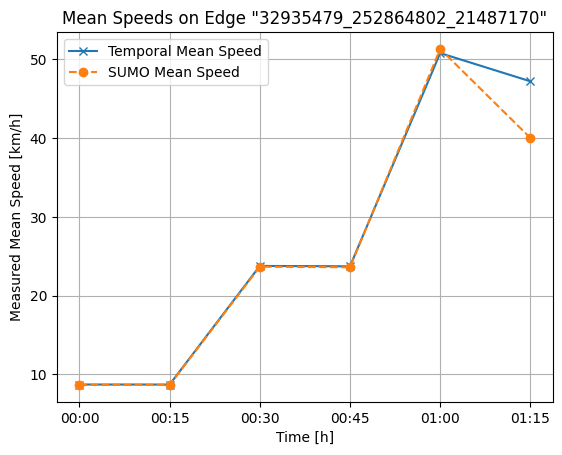

In [7]:
# Plot Traversal and Sumo Edge Data for random Edge
# extract data for first edge in resampled dataframe
inspected_street = resampled_trav_data_df.index[0][0]
inspected_street_trav_df = resampled_trav_data_df.groupby('connectionID').get_group(inspected_street)
inspected_street_trav_df = inspected_street_trav_df.reset_index(level='time')
inspected_street_edge_df = resampled_edge_data_df.groupby('connectionID').get_group(inspected_street)
# plot SUMO ground truth and temporal mean speed
fig, ax = plt.subplots()
ax.plot(inspected_street_trav_df['timeStamp'] / utils.HOUR_TO_SECOND, inspected_street_trav_df['temporalMeanSpeed'] * utils.MPS_TO_KPH, marker='x', label='Temporal Mean Speed')
ax.plot(inspected_street_edge_df['timeStamp'] / utils.HOUR_TO_SECOND, inspected_street_edge_df['speed'] * utils.MPS_TO_KPH, marker='o', linestyle='dashed', label='SUMO Mean Speed')
# set and format x-ticks
x_ticks = np.arange(0, 1.5, 0.25)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{int(x_tick):02d}:{int((x_tick - int(x_tick)) * 60):02d}' for x_tick in x_ticks])
# additional text in plot
ax.set_title(f'Mean Speeds on Edge "{inspected_street}"')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Measured Mean Speed [km/h]')
ax.legend()
ax.grid()
plt.show()

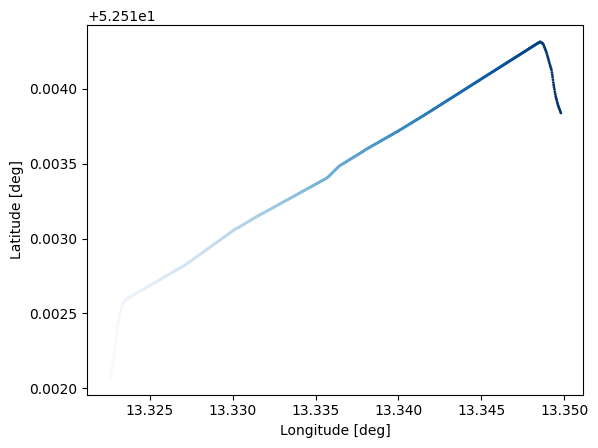

In [8]:
# Plot Trajectory (Latitudes and Longitudes) for "veh_0"
vehicle_df = fcd_records_df[fcd_records_df['vehID'] == 'veh_0']
# create scatter plot of trajectory (Note: typically we would need to convert the UTM coordinates into cartesian space, which is omitted here for simplicity’s sake) 
fig_records, ax_records = plt.subplots()
ax_records.scatter(vehicle_df['longitude'], vehicle_df['latitude'], c=vehicle_df['timeStamp'], cmap='Blues', s=1)
# additional text for plot
ax_records.set_xlabel('Longitude [deg]')
ax_records.set_ylabel('Latitude [deg]')
plt.show()

## Learnings
We showcased how data can be read from FCD databases generated by the MOSAIC TSE Apps as well as edge-based data generated by SUMO and bring them into a uniform manner.
As we were equipping 100% of the vehicles the Temporal Mean Speed captures the ground truth from SUMO very closely.

Furthermore, we demonstrated how to plot the trajectory of a single vehicle following the FCD Records.
